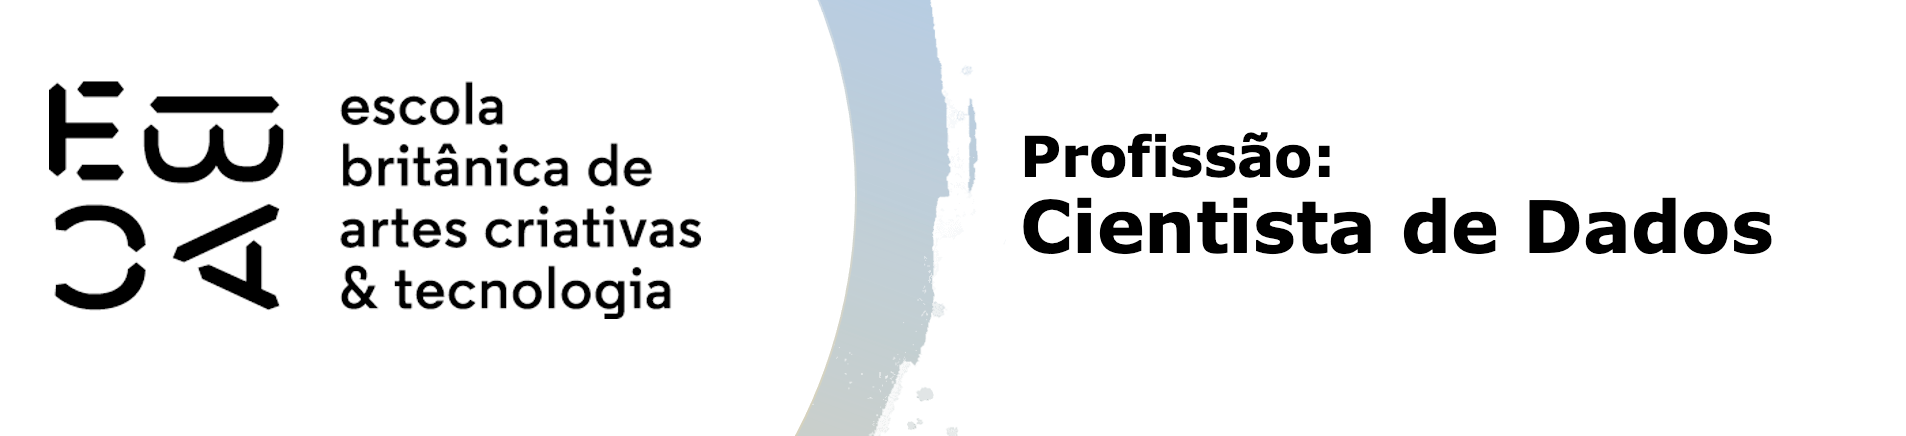

# Tarefa - Agrupamento hierárquico

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo agora é agrupar as sessões de acesso ao portal considerando o comportamento de acesso e informações da data, como a proximidade a uma data especial, fim de semana e o mês.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from scipy.spatial.distance  import squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

from gower import gower_matrix


In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False


In [4]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [5]:
# Valores missing e tamanho de df
print(f'\nQuantidade de linhas = {df.shape[0]} e colunas = {df.shape[1]}') 

print(f'Valores faltantes = {df.isna().sum().sum()}\n \n')

# Informações e detalhes do DataFrame 
df.info()


Quantidade de linhas = 12330 e colunas = 18
Valores faltantes = 0
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region

In [6]:
# Correlação dos dados
df_select = df.select_dtypes(exclude = 'object').corr()
df_select

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


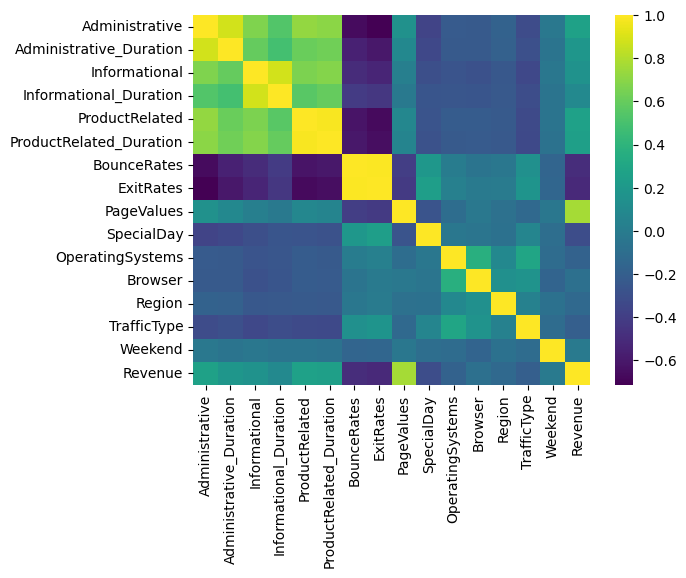

In [7]:
sns.heatmap(df_select.corr(), cmap='viridis')
plt.show()

## Variáveis de agrupamento

Liste as variáveis que você vai querer utilizar. Essa é uma atividade importante do projeto, e tipicamente não a recebemos pronta. Não há resposta pronta ou correta, mas apenas critérios e a sua decisão. Os critérios são os seguintes:

- Selecione para o agrupamento variáveis que descrevam o padrão de navegação na sessão.
- Selecione variáveis que indiquem a característica da data.
- Não se esqueça de que você vai precisar realizar um tratamento especial para variáveis qualitativas.
- Trate adequadamente valores faltantes.

#### 1. Selecione para o agrupamento variáveis que descrevam o padrão de navegação na sessão.
> **Seleção de algumas colunas:**<br>
> 'Administrative', 'Informational', 'ProductRelated', 'PageValues', 'OperatingSystems', 'Browser', 'TrafficType', 'VisitorType'

In [19]:
# Variáveis definidas em relação ao padrão de navegação na sessão:
navigation_pattern = ['Administrative',
                      'Informational',
                      'ProductRelated',
                      'PageValues',
                      'OperatingSystems', 
                      'Browser', 
                      'TrafficType', 
                      'VisitorType']

df[navigation_pattern].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Administrative    12330 non-null  int64  
 1   Informational     12330 non-null  int64  
 2   ProductRelated    12330 non-null  int64  
 3   PageValues        12330 non-null  float64
 4   OperatingSystems  12330 non-null  int64  
 5   Browser           12330 non-null  int64  
 6   TrafficType       12330 non-null  int64  
 7   VisitorType       12330 non-null  object 
dtypes: float64(1), int64(6), object(1)
memory usage: 770.8+ KB


#### 2. Selecione variáveis que indiquem a característica da data.
> **Seleção de algumas colunas:**<br>
> 'SpecialDay', 'Month', 'Weekend'

In [20]:
# Variáveis definidas em relação a característica da data:
date_characteristic = ['SpecialDay', 'Month', 'Weekend']

df[date_characteristic].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SpecialDay  12330 non-null  float64
 1   Month       12330 non-null  object 
 2   Weekend     12330 non-null  bool   
dtypes: bool(1), float64(1), object(1)
memory usage: 204.8+ KB


#### 3. Definindo bases e tratando adequadamente.


In [35]:
# Base para definida com todas as variáveis
df_base = df[navigation_pattern + date_characteristic]
# Formatando para Dummies
df_base_dum = pd.get_dummies(df_base, drop_first=False)


# Lista com nomes de colunas apenas de variáveis categóricas para listagem no modelo
df_cat = df_base_dum.drop(columns=['ProductRelated', 'PageValues', 'SpecialDay']).columns.values
# Listagem no modelo
list_cat = list(True if col in df_cat else False for col in df_base_dum)

In [44]:
pd.DataFrame(df_base_dum
 .dtypes
 .reset_index()
 .rename(columns={'index': 'Variável', 
                  0: 'Tipo'})
 .assign(Categorical=list_cat)
)

,Variável,Tipo,Categorical
0,Administrative,int64,True
1,Informational,int64,True
2,ProductRelated,int64,False
3,PageValues,float64,False
4,OperatingSystems,int64,True
5,Browser,int64,True
6,TrafficType,int64,True
7,SpecialDay,float64,False
8,Weekend,bool,True
9,VisitorType_New_Visitor,bool,True


## Número de grupos

Nesta atividade vamos adotar uma abordagem bem pragmática e avaliar agrupamentos hierárquicos com 3 e 4 grupos, por estarem bem alinhados com uma expectativa e estratégia do diretor da empresa. 

*Atenção*: Cuidado se quiser fazer o dendrograma, pois com muitas observações ele pode ser mais complicado de fazer, e dependendo de como for o comando, ele pode travar o *kernell* do seu python.

In [48]:
# Calculando as distâncias
gower = gower_matrix(df_base_dum, cat_features=list_cat)

# DataFrame da matriz Gower
pd.DataFrame(gower)

,0,1,2,3,4,5,6,7,8,9,...,12320,12321,12322,12323,12324,12325,12326,12327,12328,12329
0,0.000000,0.136428,0.090909,0.136428,0.182398,0.137524,0.154545,0.181883,0.172792,0.154674,...,0.182269,0.136686,0.274081,0.275500,0.228240,0.277618,0.272985,0.273050,0.273630,0.363765
1,0.136428,0.000000,0.136428,0.090909,0.182334,0.046551,0.109155,0.181947,0.081818,0.063701,...,0.136750,0.227531,0.137653,0.184526,0.182721,0.323008,0.227466,0.227531,0.182656,0.272792
2,0.090909,0.136428,0.000000,0.136428,0.182398,0.092070,0.109091,0.227337,0.127337,0.154674,...,0.227724,0.227595,0.274081,0.275500,0.273694,0.277618,0.272985,0.273050,0.273630,0.363765
3,0.136428,0.090909,0.136428,0.000000,0.091425,0.092005,0.154610,0.181947,0.127273,0.154610,...,0.182205,0.227531,0.228562,0.229981,0.228175,0.323008,0.182012,0.182076,0.228111,0.272792
4,0.182398,0.182334,0.182398,0.091425,0.000000,0.182398,0.200580,0.182463,0.218698,0.200451,...,0.272856,0.272985,0.318956,0.320374,0.318569,0.277038,0.182141,0.182076,0.318504,0.273179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.277618,0.323008,0.277618,0.323008,0.277038,0.321912,0.341254,0.277683,0.359372,0.341125,...,0.277167,0.277296,0.230810,0.320300,0.322105,0.000000,0.277360,0.277296,0.322170,0.368398
12326,0.272985,0.227466,0.272985,0.182012,0.182141,0.228175,0.291167,0.227595,0.263830,0.291038,...,0.136557,0.181883,0.273823,0.184333,0.182527,0.277360,0.000000,0.045519,0.182463,0.136493
12327,0.273050,0.227531,0.273050,0.182076,0.182076,0.228111,0.291231,0.227660,0.263894,0.291103,...,0.136493,0.181818,0.273759,0.184268,0.182463,0.277296,0.045519,0.000000,0.182398,0.136557
12328,0.273630,0.182656,0.273630,0.228111,0.318504,0.182076,0.246357,0.273694,0.219020,0.246228,...,0.091360,0.182398,0.182269,0.092779,0.136428,0.322170,0.182463,0.182398,0.000000,0.273501


In [53]:
# Converter os resultados para vetor
gdv = squareform(X=gower, force='tovector')
Z = linkage(y=gdv, method='complete')

# Criar um DataFrame com n grupos
z_gdv = pd.DataFrame(data=Z, columns=['id1', 'id2', 'dist', 'n'])
z_gdv

,id1,id2,dist,n
0,166.0,167.0,0.000000,2.0
1,64.0,140.0,0.000000,2.0
2,143.0,12331.0,0.000000,3.0
3,10.0,87.0,0.000000,2.0
4,60.0,163.0,0.000000,2.0
...,...,...,...,...
12324,24650.0,24653.0,0.454280,6666.0
12325,24632.0,24636.0,0.481065,1415.0
12326,24637.0,24654.0,0.506725,9222.0
12327,24652.0,24655.0,0.547158,3108.0


In [66]:
z_gdv['n'].value_counts()

n
2.0        4178
3.0        2075
4.0        1206
5.0         785
6.0         542
           ... 
282.0         1
138.0         1
131.0         1
178.0         1
12330.0       1
Name: count, Length: 275, dtype: int64

## Avaliação dos grupos

Construa os agrupamentos com a técnica adequada que vimos em aula. Não se esqueça de tratar variáveis qualitativas, padronizar escalas das quantitativas, tratar valores faltantes e utilizar a distância correta.

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [87]:
# Criamos uma coluna '3_grupos' 
df['3_grupos'] = fcluster(Z=Z, t=3, criterion='maxclust')

df['4_grupos'] = fcluster(Z=Z, t=4, criterion='maxclust')

In [90]:
# Observações por nº de grupo n
g3 = (pd.DataFrame({'Nº Grupo': df['3_grupos'].value_counts().index,
              'Observações g3': df['3_grupos'].value_counts().values})
              .set_index('Nº Grupo'))

g4 = (pd.DataFrame({'Nº Grupo': df['4_grupos'].value_counts().index,
              'Observações g4': df['4_grupos'].value_counts().values})
              .set_index('Nº Grupo'))

display(g3)
display(g4)

,Observações g3
Nº Grupo,
1,9222
2,1693
3,1415


,Observações g4
Nº Grupo,
2,6666
1,2556
3,1693
4,1415


> Percebemos que nas ```observações g3``` o N° de grupo 1 com 9222 observações é quebrado em outros dois grupos quando verificado na ```observações g4``` sendo  N° de grupo 2 com 6666 observações e N° de grupo 1 com 2556 observações

In [101]:
#"3_grupos"
# Cross-Table entre 'VisitorType', 'Revenue'
(pd.crosstab(index=df.VisitorType, 
             columns=[df['3_grupos'], df['Revenue']], 
             normalize='all')
.map(lambda x: f'{x*100:.0f} %'))

3_grupos              1           2           3      
Revenue           False True  False True  False True 
VisitorType                                          
New_Visitor         0 %   0 %  10 %   3 %   0 %   0 %
Other               0 %   0 %   0 %   0 %   1 %   0 %
Returning_Visitor  64 %  11 %   0 %   0 %  10 %   1 %

In [102]:
#"4_grupos"
# Cross-Table entre 'VisitorType', 'Revenue'
(pd.crosstab(index=df.VisitorType, 
             columns=[df['4_grupos'], df['Revenue']], 
             normalize='all')
.map(lambda x: f'{x*100:.0f} %'))

4_grupos              1           2           3           4      
Revenue           False True  False True  False True  False True 
VisitorType                                                      
New_Visitor         0 %   0 %   0 %   0 %  10 %   3 %   0 %   0 %
Other               0 %   0 %   0 %   0 %   0 %   0 %   1 %   0 %
Returning_Visitor  16 %   5 %  48 %   6 %   0 %   0 %  10 %   1 %

In [105]:
#"3_grupos"
# Cross-Table com 'Revenue'  
(pd.crosstab(index=df['Revenue'], 
             columns=df['3_grupos'], 
             normalize='all')
 .map(lambda x: f'{x*100:.2f} %')
)

3_grupos,1,2,3
Revenue,,,
False,63.90 %,10.31 %,10.32 %
True,10.89 %,3.42 %,1.16 %


In [106]:
#"4_grupos"
# Cross-Table com 'Revenue'  
(pd.crosstab(index=df['Revenue'], 
             columns=df['4_grupos'], 
             normalize='all')
 .map(lambda x: f'{x*100:.2f} %')
)

4_grupos,1,2,3,4
Revenue,,,,
False,15.63 %,48.27 %,10.31 %,10.32 %
True,5.10 %,5.79 %,3.42 %,1.16 %


In [108]:
#"3_grupos"
# Cross-Table entre 'Month', 'Revenue'
(pd.crosstab(index=df['Month'], 
             columns=[df['3_grupos'], df['Revenue']], 
             normalize='all')
 .map(lambda x: f'{x*100:.2f} %')
)

3_grupos        1               2                3        
Revenue     False   True    False   True     False   True 
Month                                                     
Aug        2.48 %  0.45 %  0.41 %  0.17 %   0.00 %  0.00 %
Dec        0.00 %  0.00 %  2.10 %  0.61 %  10.15 %  1.14 %
Feb        1.46 %  0.02 %  0.01 %  0.00 %   0.00 %  0.00 %
Jul        2.62 %  0.45 %  0.35 %  0.09 %   0.00 %  0.00 %
June       1.91 %  0.18 %  0.19 %  0.06 %   0.01 %  0.00 %
Mar       12.32 %  1.27 %  1.59 %  0.29 %   0.00 %  0.00 %
May       22.45 %  2.25 %  1.87 %  0.71 %   0.00 %  0.00 %
Nov       15.64 %  5.11 %  2.36 %  1.04 %   0.15 %  0.02 %
Oct        2.74 %  0.71 %  0.78 %  0.23 %   0.00 %  0.00 %
Sep        2.29 %  0.47 %  0.65 %  0.23 %   0.00 %  0.00 %

In [109]:
#"4_grupos"
# Cross-Table entre 'Month', 'Revenue'
(pd.crosstab(index=df['Month'], 
             columns=[df['4_grupos'], df['Revenue']], 
             normalize='all')
 .map(lambda x: f'{x*100:.2f} %')
)

4_grupos        1                2               3                4        
Revenue     False   True     False   True    False   True     False   True 
Month                                                                      
Aug        0.00 %  0.00 %   2.48 %  0.45 %  0.41 %  0.17 %   0.00 %  0.00 %
Dec        0.00 %  0.00 %   0.00 %  0.00 %  2.10 %  0.61 %  10.15 %  1.14 %
Feb        0.00 %  0.00 %   1.46 %  0.02 %  0.01 %  0.00 %   0.00 %  0.00 %
Jul        0.00 %  0.00 %   2.62 %  0.45 %  0.35 %  0.09 %   0.00 %  0.00 %
June       0.00 %  0.00 %   1.91 %  0.18 %  0.19 %  0.06 %   0.01 %  0.00 %
Mar        0.00 %  0.00 %  12.32 %  1.27 %  1.59 %  0.29 %   0.00 %  0.00 %
May        0.00 %  0.00 %  22.45 %  2.25 %  1.87 %  0.71 %   0.00 %  0.00 %
Nov       15.63 %  5.10 %   0.01 %  0.01 %  2.36 %  1.04 %   0.15 %  0.02 %
Oct        0.00 %  0.00 %   2.74 %  0.71 %  0.78 %  0.23 %   0.00 %  0.00 %
Sep        0.00 %  0.00 %   2.29 %  0.47 %  0.65 %  0.23 %   0.00 %  0.00 %

In [114]:
#"3_grupos"
# Cross-Table entre 'Revenue', 'VisitorType', 'SpecialDay'  

(pd.crosstab(index=[df.Revenue, df.VisitorType, df.SpecialDay], 
             columns=df['3_grupos'], 
             normalize='all')
 .map(lambda x: f'{x*100:.2f} %'))

3_grupos                                    1       2       3
Revenue VisitorType       SpecialDay                         
False   New_Visitor       0.0          0.00 %  9.97 %  0.01 %
                          0.2          0.00 %  0.03 %  0.00 %
                          0.4          0.00 %  0.05 %  0.00 %
                          0.6          0.00 %  0.15 %  0.00 %
                          0.8          0.00 %  0.06 %  0.00 %
                          1.0          0.00 %  0.05 %  0.00 %
        Other             0.0          0.00 %  0.00 %  0.56 %
        Returning_Visitor 0.0         54.72 %  0.00 %  9.75 %
                          0.2          1.30 %  0.00 %  0.00 %
                          0.4          1.82 %  0.00 %  0.00 %
                          0.6          2.47 %  0.00 %  0.00 %
                          0.8          2.48 %  0.00 %  0.00 %
                          1.0          1.12 %  0.00 %  0.00 %
True    New_Visitor       0.0          0.00 %  3.29 %  0.00 %
                          0.2          0.00 %  0.04 %  0.00 %
                          0.4          0.00 %  0.03 %  0.00 %
                          0.6          0.00 %  0.03 %  0.00 %
                          0.8          0.00 %  0.01 %  0.00 %
                          1.0          0.00 %  0.02 %  0.00 %
        Other             0.0          0.01 %  0.00 %  0.12 %
        Returning_Visitor 0.0         10.39 %  0.00 %  1.04 %
                          0.2          0.07 %  0.00 %  0.00 %
                          0.4          0.07 %  0.00 %  0.00 %
                          0.6          0.20 %  0.00 %  0.00 %
                          0.8          0.08 %  0.00 %  0.00 %
                          1.0          0.06 %  0.00 %  0.00 %

In [115]:
#"4_grupos"
# Cross-Table entre 'Revenue', 'VisitorType', 'SpecialDay'  

(pd.crosstab(index=[df.Revenue, df.VisitorType, df.SpecialDay], 
             columns=df['4_grupos'], 
             normalize='all')
 .map(lambda x: f'{x*100:.2f} %'))

4_grupos                                    1        2       3       4
Revenue VisitorType       SpecialDay                                  
False   New_Visitor       0.0          0.00 %   0.00 %  9.97 %  0.01 %
                          0.2          0.00 %   0.00 %  0.03 %  0.00 %
                          0.4          0.00 %   0.00 %  0.05 %  0.00 %
                          0.6          0.00 %   0.00 %  0.15 %  0.00 %
                          0.8          0.00 %   0.00 %  0.06 %  0.00 %
                          1.0          0.00 %   0.00 %  0.05 %  0.00 %
        Other             0.0          0.00 %   0.00 %  0.00 %  0.56 %
        Returning_Visitor 0.0         15.63 %  39.09 %  0.00 %  9.75 %
                          0.2          0.00 %   1.30 %  0.00 %  0.00 %
                          0.4          0.00 %   1.82 %  0.00 %  0.00 %
                          0.6          0.00 %   2.47 %  0.00 %  0.00 %
                          0.8          0.00 %   2.48 %  0.00 %  0.00 %
                          1.0          0.00 %   1.12 %  0.00 %  0.00 %
True    New_Visitor       0.0          0.00 %   0.00 %  3.29 %  0.00 %
                          0.2          0.00 %   0.00 %  0.04 %  0.00 %
                          0.4          0.00 %   0.00 %  0.03 %  0.00 %
                          0.6          0.00 %   0.00 %  0.03 %  0.00 %
                          0.8          0.00 %   0.00 %  0.01 %  0.00 %
                          1.0          0.00 %   0.00 %  0.02 %  0.00 %
        Other             0.0          0.01 %   0.00 %  0.00 %  0.12 %
        Returning_Visitor 0.0          5.09 %   5.30 %  0.00 %  1.04 %
                          0.2          0.00 %   0.07 %  0.00 %  0.00 %
                          0.4          0.00 %   0.07 %  0.00 %  0.00 %
                          0.6          0.00 %   0.20 %  0.00 %  0.00 %
                          0.8          0.00 %   0.08 %  0.00 %  0.00 %
                          1.0          0.00 %   0.06 %  0.00 %  0.00 %

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

> Observando a coluna ```3_grupos``` conseguimos concluir que ```Returning_Visitor``` sendo este do ```Grupo 1```possuem maior chance de realizar uma compra. O mesmo ocorre com ```New_Visitor``` sendo do ```Grupo 2``` também possuem maior chance de realizar a compra.
> 
> Essa conclusão pode ser sustentada através das tabelas entre as variáveis de navegação e as características temporais que utilizamos como o mês ou data especial, que resultaram em insight poderosos podendo levar a equipe responsável a otimizar a experiência do usuário alcançando novos objetivos partindo de novas estratégias baseada em informação.